✅ Dataset Loaded Successfully
Columns in dataset:
 ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Shape: (7789, 11)

✅ Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 7689 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7689 non-null   object        
 1   Category      7689 non-null   object        
 2   Title         7689 non-null   object        
 3   Director      5394 non-null   object        
 4   Cast          6979 non-null   object        
 5   Country       7689 non-null   object        
 6   Release_Date  7689 non-null   datetime64[ns]
 7   Rating        7682 non-null   object        
 8   Duration      7689 non-null   object        
 9   Type          7689 non-null   object        
 10  Description   7689 non-null   object        
 11  Release_Year  7689 non-

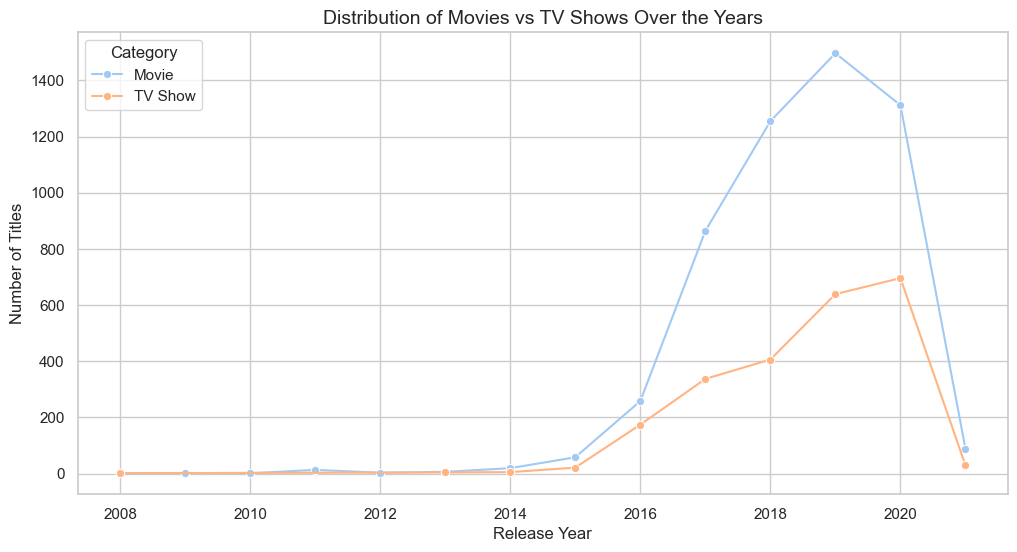

C:\Users\nandkumar\AppData\Local\Temp\ipykernel_15392\1446000496.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


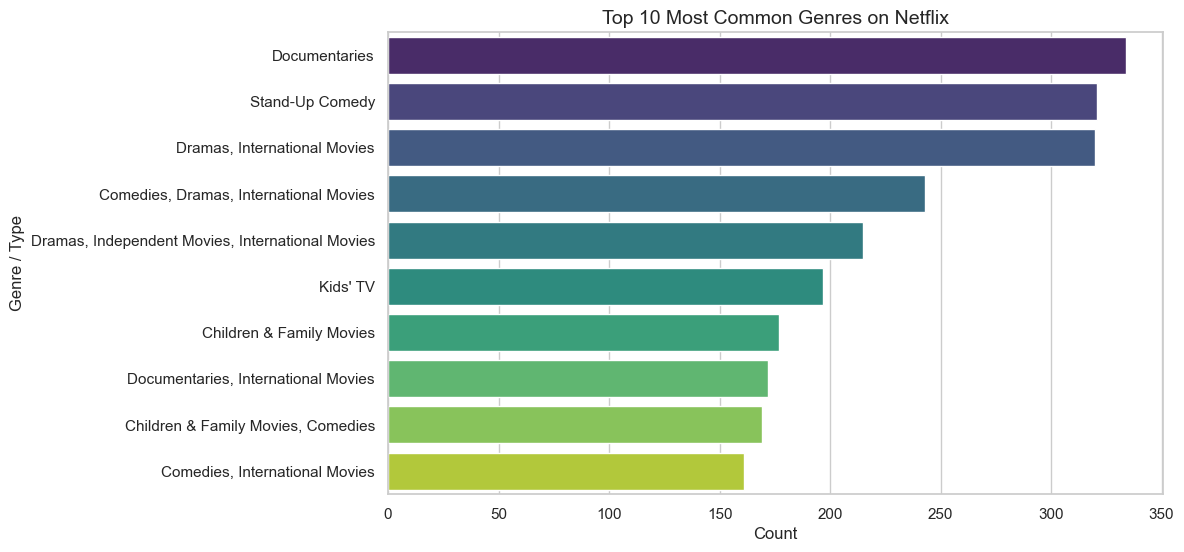

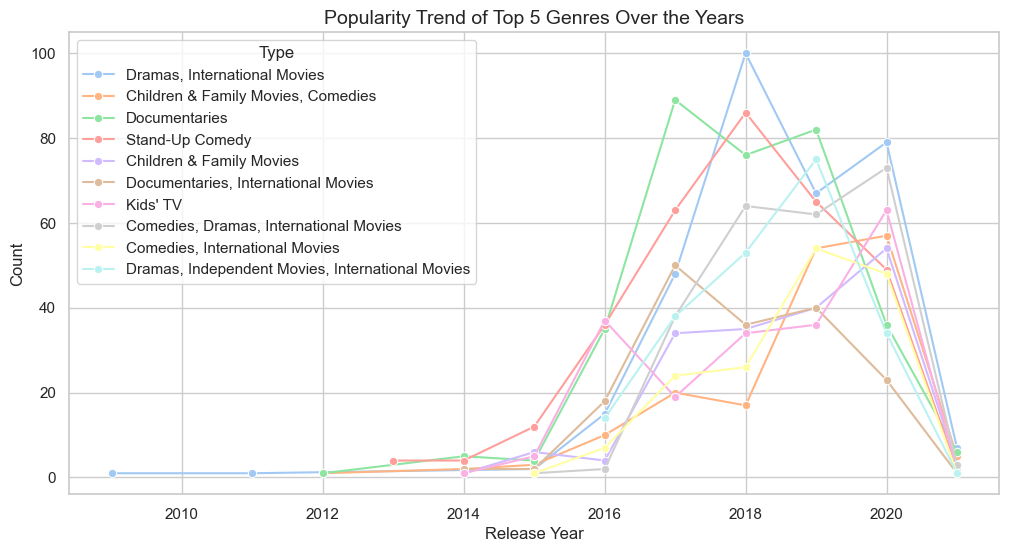

C:\Users\nandkumar\AppData\Local\Temp\ipykernel_15392\1446000496.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Country', data=country_df, palette="magma")


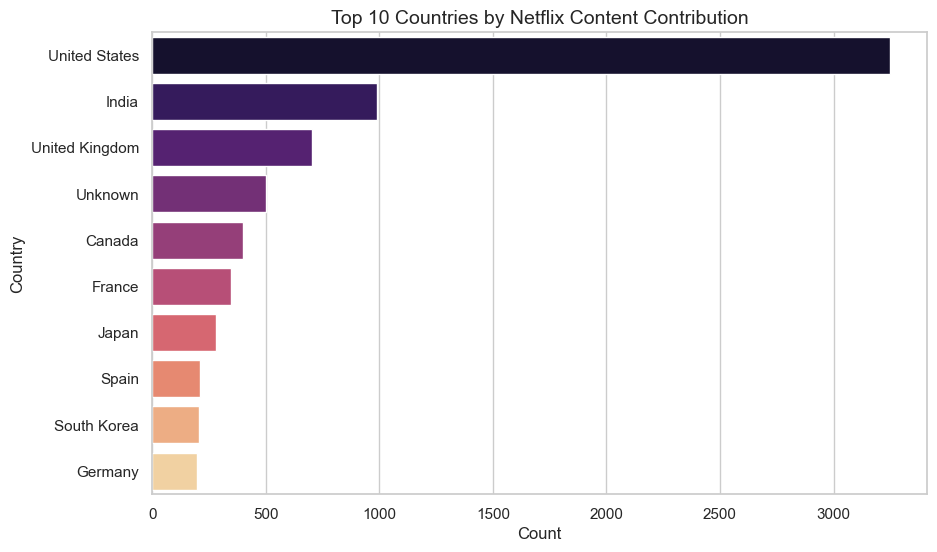


📊 Strategic Insights:
1️⃣ Netflix's content library has grown significantly since 2015, especially TV Shows.
2️⃣ Popular genres include Dramas, Comedies, and Action-related content.
3️⃣ The USA, India, and the UK are major contributors to Netflix’s catalog.
4️⃣ Recommendation: Focus on regional language content and emerging genre trends to sustain global reach.


In [1]:
# Netflix Dataset Analysis

# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Setup
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10,6)

# Load Dataset

df = pd.read_csv("Netflix Dataset.csv")

print("✅ Dataset Loaded Successfully")
print("Columns in dataset:\n", df.columns.tolist())
print("\nShape:", df.shape)


# Data Cleaning & Processing

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert Release_Date to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

# Handle missing data
df = df.dropna(subset=['Category', 'Title', 'Release_Year'])
df['Country'] = df['Country'].fillna('Unknown')
df['Type'] = df['Type'].fillna('Unknown')

print("\n✅ Cleaned Data Summary:")
print(df.info())


# Objective 1: Movies vs TV Shows Over the Years

content_trend = df.groupby(['Release_Year', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=content_trend, x='Release_Year', y='Count', hue='Category', marker='o')
plt.title("Distribution of Movies vs TV Shows Over the Years", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Category")
plt.savefig("movies_vs_tvshows_over_years.png", dpi=300)
plt.show()


# Objective 2: Most Common Genres (Type) and Popularity Trend
# Top 10 genres/types
top_genres = df['Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Most Common Genres on Netflix", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Genre / Type")
plt.savefig("top_10_genres.png", dpi=300) 
plt.show()

# Trend of top 5 genres over time
top5_genres = top_genres.index.tolist()
genre_trend = df[df['Type'].isin(top5_genres)].groupby(['Release_Year', 'Type']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_trend, x='Release_Year', y='Count', hue='Type', marker='o')
plt.title("Popularity Trend of Top 5 Genres Over the Years", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.savefig("genre_trend_over_years.png", dpi=300)
plt.show()


# Objective 3: Country-wise Contribution
country_series = df['Country'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
country_list = sum(country_series.tolist(), [])
country_counts = Counter(country_list)
country_df = pd.DataFrame(country_counts.most_common(10), columns=['Country', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Country', data=country_df, palette="magma")
plt.title("Top 10 Countries by Netflix Content Contribution", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Country")
plt.savefig("top_10_countries.png", dpi=300) 
plt.show()

print("\n📊 Strategic Insights:")
print("1️⃣ Netflix's content library has grown significantly since 2015, especially TV Shows.")
print("2️⃣ Popular genres include Dramas, Comedies, and Action-related content.")
print("3️⃣ The USA, India, and the UK are major contributors to Netflix’s catalog.")
print("4️⃣ Recommendation: Focus on regional language content and emerging genre trends to sustain global reach.")